In [ ]:
import pandas as pd
df=pd.read_csv(r"/content/drive/MyDrive/career_change_prediction_dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,198266,8,0,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,96803,9,0,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,65920,4,0,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,85591,5,0,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,43986,3,0,5,Low,0,0,1,0,2,0,7,1


In [ ]:
df.isnull().sum()

,0
Field of Study,0
Current Occupation,0
Age,0
Gender,0
Years of Experience,0
Education Level,0
Industry Growth Rate,0
Job Satisfaction,0
Work-Life Balance,0
Job Opportunities,0


preprocessing

In [ ]:
df['Family Influence'] = df['Family Influence'].fillna('Unknown')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Field of Study               38444 non-null  object
 1   Current Occupation           38444 non-null  object
 2   Age                          38444 non-null  int64 
 3   Gender                       38444 non-null  object
 4   Years of Experience          38444 non-null  int64 
 5   Education Level              38444 non-null  object
 6   Industry Growth Rate         38444 non-null  object
 7   Job Satisfaction             38444 non-null  int64 
 8   Work-Life Balance            38444 non-null  int64 
 9   Job Opportunities            38444 non-null  int64 
 10  Salary                       38444 non-null  int64 
 11  Job Security                 38444 non-null  int64 
 12  Career Change Interest       38444 non-null  int64 
 13  Skills Gap                   38

In [ ]:
numerical_columns = ['Age', 'Years of Experience', 'Job Satisfaction', 'Work-Life Balance',
                     'Job Opportunities', 'Salary', 'Job Security', 'Career Change Interest',
                     'Skills Gap', 'Mentorship Available', 'Certifications',
                     'Freelancing Experience', 'Geographic Mobility', 'Professional Networks',
                     'Career Change Events', 'Technology Adoption', 'Likely to Change Occupation']
c=0
for i in numerical_columns:
  for j in df[i]:
    if j<0:
      c+=1
print(c)

0


 Calculate z-scores for numerical columns

In [ ]:

from scipy.stats import zscore


z_scores = df[numerical_columns].apply(zscore)


threshold = 2

# Find outliers
outliers_z = {}
for column in numerical_columns:
    outliers_z[column] = df[z_scores[column].abs() > threshold]
    print(f"Outliers in column '{column}': {len(outliers_z[column])} rows")



Outliers in column 'Age': 0 rows
Outliers in column 'Years of Experience': 0 rows
Outliers in column 'Job Satisfaction': 0 rows
Outliers in column 'Work-Life Balance': 0 rows
Outliers in column 'Job Opportunities': 0 rows
Outliers in column 'Salary': 0 rows
Outliers in column 'Job Security': 0 rows
Outliers in column 'Career Change Interest': 7685 rows
Outliers in column 'Skills Gap': 0 rows
Outliers in column 'Mentorship Available': 0 rows
Outliers in column 'Certifications': 0 rows
Outliers in column 'Freelancing Experience': 5736 rows
Outliers in column 'Geographic Mobility': 0 rows
Outliers in column 'Professional Networks': 0 rows
Outliers in column 'Career Change Events': 0 rows
Outliers in column 'Technology Adoption': 0 rows
Outliers in column 'Likely to Change Occupation': 0 rows


In [ ]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
outliers_iqr = {}
for column in numerical_columns:
  outliers_iqr[column] = df[(df[column] > upper_bound[column]) | (df[column] < lower_bound[column])]
  print(f"Outliers in column '{column}': {len(outliers_iqr[column])} rows")

Outliers in column 'Age': 0 rows
Outliers in column 'Years of Experience': 0 rows
Outliers in column 'Job Satisfaction': 0 rows
Outliers in column 'Work-Life Balance': 0 rows
Outliers in column 'Job Opportunities': 0 rows
Outliers in column 'Salary': 0 rows
Outliers in column 'Job Security': 0 rows
Outliers in column 'Career Change Interest': 7685 rows
Outliers in column 'Skills Gap': 0 rows
Outliers in column 'Mentorship Available': 0 rows
Outliers in column 'Certifications': 0 rows
Outliers in column 'Freelancing Experience': 5736 rows
Outliers in column 'Geographic Mobility': 0 rows
Outliers in column 'Professional Networks': 0 rows
Outliers in column 'Career Change Events': 0 rows
Outliers in column 'Technology Adoption': 0 rows
Outliers in column 'Likely to Change Occupation': 0 rows


In [ ]:
from scipy.stats.mstats import winsorize


for column in numerical_columns:
    df[column] = winsorize(df[column], limits=(0.05, 0.05))

print("Winsorized data applied to cap outliers.")


Winsorized data applied to cap outliers.


In [ ]:
df['Education Level'].unique()

array(['High School', "Master's", 'PhD', "Bachelor's"], dtype=object)

Columns to label encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


df1 = df.copy()


categorical_cols = df.select_dtypes(include=['object', 'category']).columns


label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df1[col] = label_encoders[col].fit_transform(df1[col])

print("Label Encoded DataFrame:")
df1.info()
df1.head()


Label Encoded DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Field of Study               38444 non-null  int64
 1   Current Occupation           38444 non-null  int64
 2   Age                          38444 non-null  int64
 3   Gender                       38444 non-null  int64
 4   Years of Experience          38444 non-null  int64
 5   Education Level              38444 non-null  int64
 6   Industry Growth Rate         38444 non-null  int64
 7   Job Satisfaction             38444 non-null  int64
 8   Work-Life Balance            38444 non-null  int64
 9   Job Opportunities            38444 non-null  int64
 10  Salary                       38444 non-null  int64
 11  Job Security                 38444 non-null  int64
 12  Career Change Interest       38444 non-null  int64
 13  Skills Gap           

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,8,2,48,1,7,1,0,7,10,83,191526,8,0,8,0,0,0,0,1,2,0,1,0
1,5,4,44,1,26,2,1,10,3,55,96803,9,0,3,2,0,0,1,1,2,1,9,0
2,5,1,21,0,27,2,1,8,3,78,65920,4,0,4,1,0,0,0,0,2,1,2,0
3,5,2,33,1,14,3,2,7,9,62,85591,5,0,2,2,1,0,0,0,9,0,1,0
4,0,3,28,0,1,3,1,3,1,8,43986,3,0,5,1,0,0,1,0,2,0,7,1


In [ ]:
df1['Current Occupation'].unique()

array([2, 4, 1, 3, 5, 8, 0, 7, 9, 6])

Apply One-Hot Encoding

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Field of Study               38444 non-null  int64
 1   Current Occupation           38444 non-null  int64
 2   Age                          38444 non-null  int64
 3   Gender                       38444 non-null  int64
 4   Years of Experience          38444 non-null  int64
 5   Education Level              38444 non-null  int64
 6   Industry Growth Rate         38444 non-null  int64
 7   Job Satisfaction             38444 non-null  int64
 8   Work-Life Balance            38444 non-null  int64
 9   Job Opportunities            38444 non-null  int64
 10  Salary                       38444 non-null  int64
 11  Job Security                 38444 non-null  int64
 12  Career Change Interest       38444 non-null  int64
 13  Skills Gap                   38444 non-null  i

In [ ]:
# Configure pandas to display all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
df1[:][:10]

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,8,2,48,1,7,1,0,7,10,83,191526,8,0,8,0,0,0,0,1,2,0,1,0
1,5,4,44,1,26,2,1,10,3,55,96803,9,0,3,2,0,0,1,1,2,1,9,0
2,5,1,21,0,27,2,1,8,3,78,65920,4,0,4,1,0,0,0,0,2,1,2,0
3,5,2,33,1,14,3,2,7,9,62,85591,5,0,2,2,1,0,0,0,9,0,1,0
4,0,3,28,0,1,3,1,3,1,8,43986,3,0,5,1,0,0,1,0,2,0,7,1
5,8,5,56,1,38,0,1,3,1,95,143252,3,0,10,2,1,0,0,0,10,0,3,1
6,8,8,51,0,29,1,1,7,4,13,92623,7,0,6,0,1,1,0,1,4,1,10,0
7,8,0,57,0,32,1,0,9,4,77,85016,3,0,8,2,0,0,0,0,6,0,4,0
8,3,8,31,0,38,0,1,1,5,56,123264,1,1,6,2,0,1,0,0,10,1,7,1
9,2,3,30,0,16,2,2,8,5,95,119045,1,0,6,0,0,0,0,0,3,2,3,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns=['Likely to Change Occupation'])
y = df1['Likely to Change Occupation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

# Output the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (30755, 22)
X_test shape: (7689, 22)
y_train shape: (30755,)
y_test shape: (7689,)


In [ ]:
print(logreg_model.coef_)
print(logreg_model.intercept_)


[[ 2.01835146e-02 -4.46751300e-02 -1.70592464e-02  2.08014616e-02
  -1.34415403e-02  3.05634219e-03  3.01477600e-02 -3.20072408e+00
  -1.16305514e-02 -2.51174165e-02 -1.26155867e+00 -7.82654023e-03
   4.87023908e+00  8.49659748e-03 -2.21342418e-02 -2.16878886e-03
  -4.93039626e-03  3.23402817e-02 -1.99626418e-02  7.45837076e-03
   3.06094086e-02  2.03560305e-02]]
[2.12140457]


In [ ]:
print(df1['Likely to Change Occupation'].value_counts())

Likely to Change Occupation
1    22165
0    16279
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,classification_report
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg_model = LogisticRegression(
    solver='saga',
    max_iter=10000,
    random_state=42
)
logreg_model.fit(X_train_scaled, y_train)
logreg_preds = logreg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, logreg_preds)
report = classification_report(y_test, logreg_preds)
print(f"Logistic Regression Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

Logistic Regression Accuracy: 0.9033684484328262

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      3256
           1       0.92      0.92      0.92      4433

    accuracy                           0.90      7689
   macro avg       0.90      0.90      0.90      7689
weighted avg       0.90      0.90      0.90      7689



In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


knn_classifier = KNeighborsClassifier(n_neighbors=11)


knn_classifier.fit(X_train, y_train)


knn_predictions = knn_classifier.predict(X_test)


accuracy = accuracy_score(y_test, knn_predictions)
report = classification_report(y_test, knn_predictions)


print(f"KNN Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

KNN Accuracy: 0.5695148914033035

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.47      0.48      3256
           1       0.62      0.64      0.63      4433

    accuracy                           0.57      7689
   macro avg       0.56      0.56      0.56      7689
weighted avg       0.57      0.57      0.57      7689



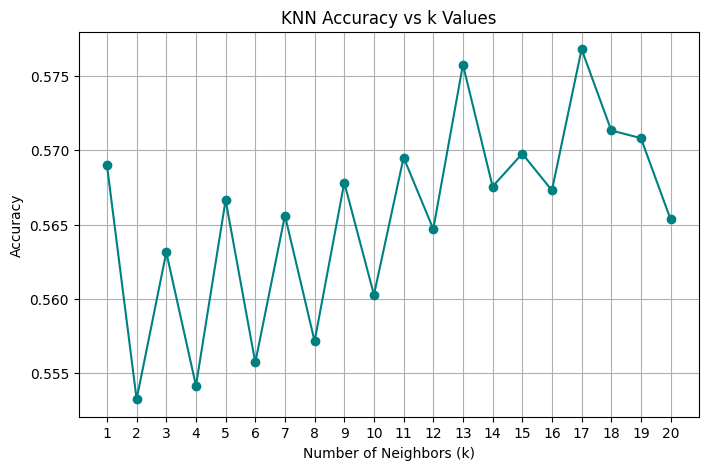

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Track accuracy for different k values
k_values = range(1, 21)  # Test k values from 1 to 20
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_preds = knn.predict(X_test)
    acc = accuracy_score(y_test, knn_preds)
    accuracies.append(acc)
# Plotting the line graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='teal')
plt.title('KNN Accuracy vs k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)  # Show all k values on the x-axis
plt.grid(True)
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, nb_predictions)
report = classification_report(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

Naive Bayes Accuracy: 0.8010144362075693

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77      3256
           1       0.83      0.83      0.83      4433

    accuracy                           0.80      7689
   macro avg       0.80      0.80      0.80      7689
weighted avg       0.80      0.80      0.80      7689



In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(class_weight='balanced')


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svc_classifier = SVC(kernel='rbf', random_state=42)

svc_classifier.fit(X_train, y_train)

svc_predictions = svc_classifier.predict(X_test)

accuracy = accuracy_score(y_test, svc_predictions)
report = classification_report(y_test, svc_predictions)

print(f"SVC Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

SVC Accuracy: 0.5765379113018598

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3256
           1       0.58      1.00      0.73      4433

    accuracy                           0.58      7689
   macro avg       0.29      0.50      0.37      7689
weighted avg       0.33      0.58      0.42      7689



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
linear_svc_classifier = LinearSVC(random_state=42, max_iter=10000)
linear_svc_classifier.fit(X_train, y_train)
linear_svc_predictions = linear_svc_classifier.predict(X_test)
accuracy = accuracy_score(y_test, linear_svc_predictions)
report = classification_report(y_test, linear_svc_predictions)
print(f"LinearSVC Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

LinearSVC Accuracy: 0.8252048380803746

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      3256
           1       0.85      0.85      0.85      4433

    accuracy                           0.83      7689
   macro avg       0.82      0.82      0.82      7689
weighted avg       0.83      0.83      0.83      7689



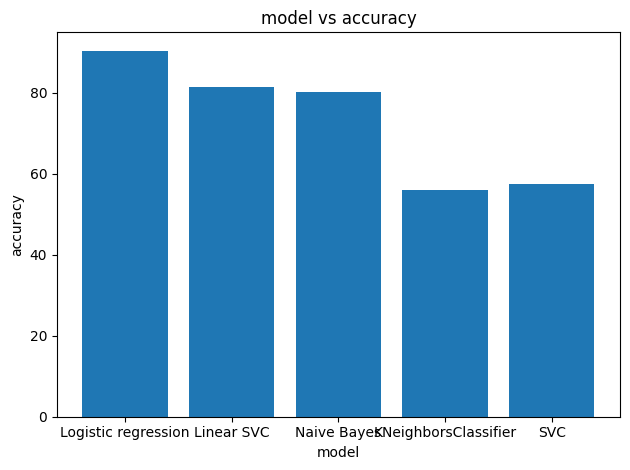

In [ ]:
import matplotlib.pyplot as plt
m=["Logistic regression","Linear SVC","Naive Bayes","KNeighborsClassifier","SVC"]
acc=[90.46,81.4,80.2,55.93,57.6]
plt.bar(m,acc)
plt.xlabel("model")
plt.ylabel("accuracy")
plt.title("model vs accuracy")
plt.tight_layout()
plt.show()

In [ ]:
import pickle
with open('/content/drive/MyDrive/logistic_regression_model1.pkl', 'wb') as file:
    pickle.dump(logreg_model, file)
with open('/content/drive/MyDrive/knn_model1.pkl', 'wb') as file:
    pickle.dump(knn_classifier, file)

with open('/content/drive/MyDrive/naive_bayes_model1.pkl', 'wb') as file:
    pickle.dump(nb_classifier, file)

with open('/content/drive/MyDrive/svc_rbf_model1.pkl', 'wb') as file:
    pickle.dump(svc_classifier, file)

with open('/content/drive/MyDrive/linear_svc_model1.pkl', 'wb') as file:
    pickle.dump(linear_svc_classifier, file)

In [ ]:
probs = nb_classifier.predict_proba(X_test)
print(probs[:10])

[[0.48672962 0.51327038]
 [0.19383146 0.80616854]
 [0.46874874 0.53125126]
 [0.54680799 0.45319201]
 [0.82038961 0.17961039]
 [0.61668654 0.38331346]
 [0.17392981 0.82607019]
 [0.76877924 0.23122076]
 [0.08314102 0.91685898]
 [0.09955857 0.90044143]]


In [ ]:
import numpy as np

threshold = 0.4  # Adjust this value (try 0.55, 0.6, 0.65)
adjusted_preds = (nb_classifier.predict_proba(X_test)[:, 1] > threshold).astype(int)

from sklearn.metrics import accuracy_score, classification_report
print("Adjusted Predictions Report:")
print(classification_report(y_test, adjusted_preds))


Adjusted Predictions Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70      3256
           1       0.76      0.89      0.82      4433

    accuracy                           0.78      7689
   macro avg       0.78      0.75      0.76      7689
weighted avg       0.78      0.78      0.77      7689

